This notebook provides examples to go along with the [textbook](http://manipulation.csail.mit.edu/pick.html).  I recommend having both windows open, side-by-side!

In [9]:
import pydot
from IPython.display import SVG, display
from pydrake.all import MultibodyPlant, Parser

from manipulation.utils import ConfigureParser

from pydrake.multibody.tree import ModelInstanceIndex  # Add this import

# Inspecting the kinematic tree

Here is a simple example that demonstrates how to inspect the kinematic tree stored in a `MultibodyPlant`.

Skipping model 'WorldModelInstance': GetFrameByName(): There is no Frame named 'base' anywhere in the model (valid names in model instance 'WorldModelInstance' are: world; valid names in model instance 'allegro_hand_right' are: __model__, hand_root, joint_0_child, joint_0_joint_0_child_M, joint_0_joint_0_parent_F, joint_0_parent, joint_10_child, joint_10_joint_10_child_M, joint_10_joint_10_parent_F, joint_10_parent, joint_11_child, joint_11_joint_11_child_M, joint_11_joint_11_parent_F, joint_11_parent, joint_12_child, joint_12_joint_12_child_M, joint_12_joint_12_parent_F, joint_12_parent, joint_13_child, joint_13_joint_13_child_M, joint_13_joint_13_parent_F, joint_13_parent, joint_14_child, joint_14_joint_14_child_M, joint_14_joint_14_parent_F, joint_14_parent, joint_15_child, joint_15_joint_15_child_M, joint_15_joint_15_parent_F, joint_15_parent, joint_1_child, joint_1_joint_1_child_M, joint_1_joint_1_parent_F, joint_1_parent, joint_2_child, joint_2_joint_2_child_M, joint_2_joint_2_pa

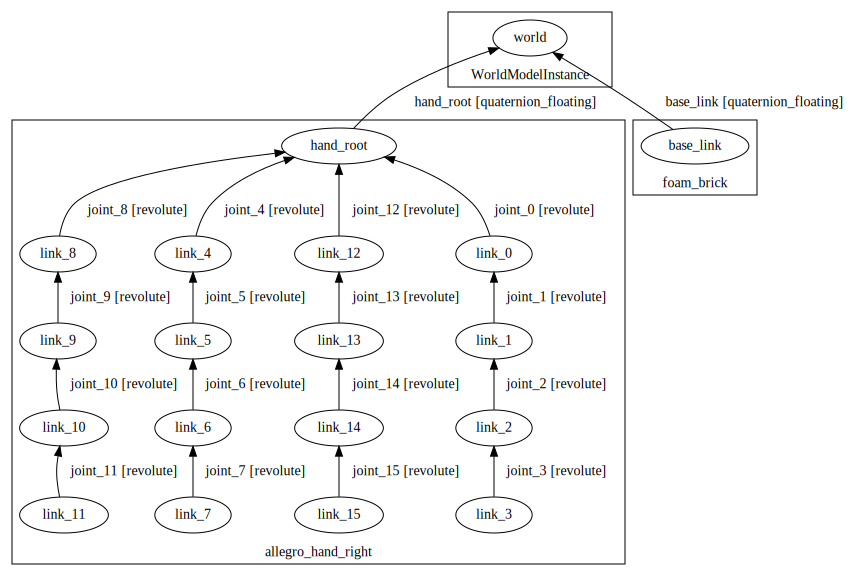

In [10]:
def kinematic_tree_example():
    plant = MultibodyPlant(time_step=0.0)
    parser = Parser(plant)
    ConfigureParser(parser)     #  配置解析器来
    parser.AddModelsFromUrl( # 添加一个机械臂
        "package://drake_models/allegro_hand_description/sdf/allegro_hand_description_right.sdf"
    )
    parser.AddModelsFromUrl( # 添加一个盒子
        "package://drake_models/manipulation_station/061_foam_brick.sdf"
    )
    plant.Finalize()

    # TODO(russt): Add floating base connections
    # 为每个模型添加浮动基座
    for i in range(plant.num_model_instances()):
        model_instance = ModelInstanceIndex(i)  # Convert int to ModelInstanceIndex
        name = plant.GetModelInstanceName(model_instance)
        try:
            plant.WeldFrames(
                plant.world_frame(),
                plant.GetFrameByName("base", model_instance)
            )
        except Exception as e:
            print(f"Skipping model '{name}': {e}")
    # TODO(russt): Consider a more interactive javascript rendering?
    dot_string = plant.GetTopologyGraphvizString()
    display(
        SVG(
            pydot.graph_from_dot_data(plant.GetTopologyGraphvizString())[0].create_svg()
        )
    )


kinematic_tree_example()

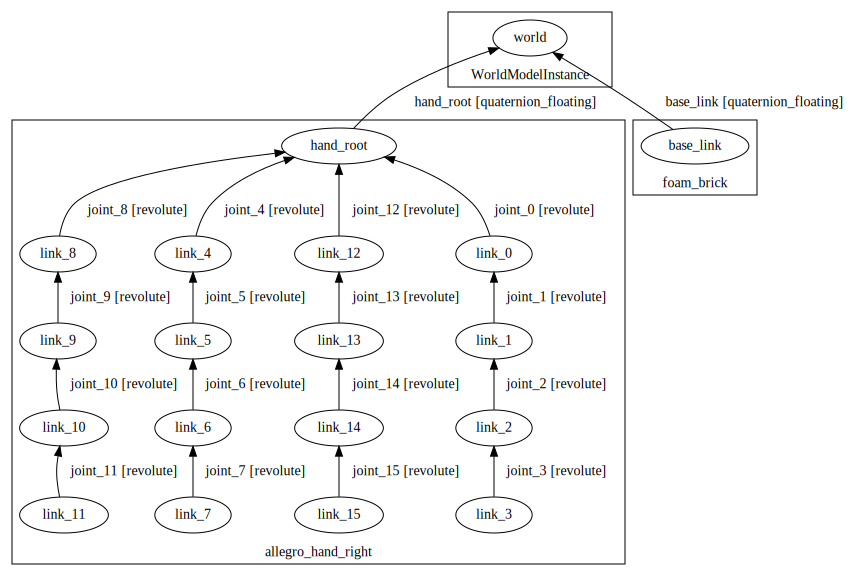

In [ ]:
plant = MultibodyPlant(time_step=0.0)
parser = Parser(plant)
ConfigureParser(parser)     #  配置解析器来
parser.AddModelsFromUrl( # 添加一个机械臂
        "package://drake_models/allegro_hand_description/sdf/allegro_hand_description_right.sdf"
    )
parser.AddModelsFromUrl( # 添加一个盒子
        "package://drake_models/manipulation_station/061_foam_brick.sdf"
    )
plant.Finalize()
display(
        SVG(
            pydot.graph_from_dot_data(plant.GetTopologyGraphvizString())[0].create_svg()
        )
    )
